In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [488]:
owid_vpop_USA = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/us_state_vaccinations.csv')
owid_vpop_USA.sort_values(by=['location', 'date'])
owid_vpop_USA.loc[:, 'datetime'] = pd.to_datetime(owid_vpop_USA.loc[:, 'date'])
owid_vpop_USA = owid_vpop_USA.set_index(['location', 'datetime'], drop=False)
owid_vpop_USA.rename_axis(['location_index', 'datetime_index'], axis='index', inplace=True)
# owid_vpop_USA.asfreq(freq='D')

owid_vpop_USA.head()

date location  total_vaccinations  \
location_index datetime_index                                            
Alabama        2021-01-12      2021-01-12  Alabama             78134.0   
               2021-01-13      2021-01-13  Alabama             84040.0   
               2021-01-14      2021-01-14  Alabama             92300.0   
               2021-01-15      2021-01-15  Alabama            100567.0   
               2021-01-16      2021-01-16  Alabama                 NaN   

                               total_distributed  people_vaccinated  \
location_index datetime_index                                         
Alabama        2021-01-12               377025.0            70861.0   
               2021-01-13               378975.0            74792.0   
               2021-01-14               435350.0            80480.0   
               2021-01-15               444650.0            86956.0   
               2021-01-16                    NaN                NaN   

                               people_fully_vaccinated_per_hundred  \
location_index datetime_index                                        
Alabama        2021-01-12                                     0.15   
               2021-01-13                                     0.19   
               2021-01-14                                      NaN   
               2021-01-15                                     0.28   
               2021-01-16                                      NaN   

                               total_vaccinations_per_hundred  \
location_index datetime_index                                   
Alabama        2021-01-12                                1.59   
               2021-01-13                                1.71   
               2021-01-14                                1.88   
               2021-01-15                                2.05   
               2021-01-16                                 NaN   

                               people_fully_vaccinated  \
location_index datetime_index                            
Alabama        2021-01-12                       7270.0   
               2021-01-13                       9245.0   
               2021-01-14                          NaN   
               2021-01-15                      13488.0   
               2021-01-16                          NaN   

                               people_vaccinated_per_hundred  \
location_index datetime_index                                  
Alabama        2021-01-12                               1.45   
               2021-01-13                               1.53   
               2021-01-14                               1.64   
               2021-01-15                               1.77   
               2021-01-16                                NaN   

                               distributed_per_hundred  \
location_index datetime_index                            
Alabama        2021-01-12                         7.69   
               2021-01-13                         7.73   
               2021-01-14                         8.88   
               2021-01-15                         9.07   
               2021-01-16                          NaN   

                               daily_vaccinations_raw  daily_vaccinations  \
location_index datetime_index                                               
Alabama        2021-01-12                         NaN                 NaN   
               2021-01-13                      5906.0              5906.0   
               2021-01-14                      8260.0              7083.0   
               2021-01-15                      8267.0              7478.0   
               2021-01-16                      7557.0              7498.0   

                               daily_vaccinations_per_million  \
location_index datetime_index                                   
Alabama        2021-01-12                                 NaN   
               2021-01-13                              1205.0   
          

datetime_index
2021-01-12     2.79
2021-01-13     2.97
2021-01-14     3.16
2021-01-15     3.46
2021-01-16      NaN
              ...  
2021-04-27    37.42
2021-04-28    37.65
2021-04-29    37.93
2021-04-30    38.26
2021-05-01    38.50
Freq: D, Name: people_vaccinated_per_hundred, Length: 110, dtype: float64

In [447]:
owid_vpop_USA.index.levels[1].freq='D'

In [448]:
StateNames = ['Washington', 'Alabama', 'Texas']
StateList = [ owid_vpop_USA.loc[State] for State in StateNames ]

Text(0.5, 1.0, 'Vaccination Rate in US States')

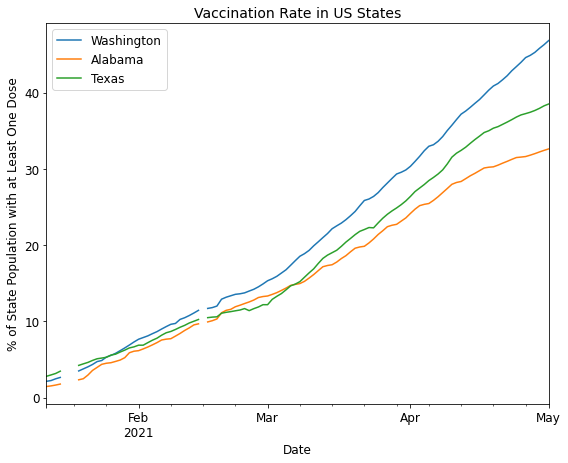

In [449]:
for State in StateNames:
    pc_full_fig = owid_vpop_USA.loc[State, 'people_vaccinated_per_hundred'].plot(figsize=(9,7))
plt.legend(StateNames, fontsize=12)
# pc_full_fig.axis_params(labelsize=12)
pc_full_fig.tick_params(labelsize=12)
plt.xlabel('Date', fontdict={'size': 12})
plt.ylabel('% of State Population with at Least One Dose', fontdict={'size': 12})
plt.title('Vaccination Rate in US States', fontdict={'size': 14})

In [450]:
# Random Forest model function

from sklearn.ensemble import RandomForestRegressor

def get_random_forest_mae(X_trn, X_tst, y_trn, y_tst):
    vax_model = RandomForestRegressor(random_state=1)
    vax_model.fit(X_trn, y_trn)
    y_tst_prd = vax_model.predict(X_tst)
    mae = mean_absolute_error(y_tst, y_tst_prd)
    return(y_tst_prd, mae)

In [475]:
# def rf_pred(State):

#     y = owid_vpop_USA.loc[State, 'people_vaccinated_per_hundred'].asfreq('D') # use percent of population with >= 1 vaccine as y-variable
#     X = owid_vpop_USA.loc[State].index # use datetime as x-variable
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#     y_test_pred, mae = get_random_forest_mae(X_train, X_test, y_train, y_test)
    
#     plt.plot(pd.concat([X_train, X_test]), pd.concat([y_train, y_test]))
#     plt.plot(pd.concat([X_train, X_test]), pd.concat([y_train, y_test_pred]))
    
#     vax_model = RandomForestRegressor(random_state=1)
#     vax_model.fit(X_trainn, y_train)
#     y_test_pred = vax_model.predict(X_test)
#     mae = mean_absolute_error(y_test, y_test_pred)
    
#     return(y_test_pred, mae)

# #     Y_list.append()
# #     X_list.append()
# #     X_train_list.append(x_train)

In [453]:
owid_vpop_USA['people_vaccinated_per_hundred']

location_index  datetime_index
Alabama         2021-01-12         1.45
                2021-01-13         1.53
                2021-01-14         1.64
                2021-01-15         1.77
                2021-01-16          NaN
                                  ...  
Wyoming         2021-04-27        33.62
                2021-04-28        33.64
                2021-04-29        33.85
                2021-04-30        33.94
                2021-05-01        34.07
Name: people_vaccinated_per_hundred, Length: 7173, dtype: float64

In [490]:
X_train.dtypes

total_vaccinations    float64
total_distributed     float64
dtype: object

In [360]:
df_test_pred[y_col].values

array([22.0707, 11.1003, 19.7252, 27.1256, 11.448 , 18.156 , 16.9982,
       32.3884, 10.4733, 19.2395, 37.2589, 13.8394, 35.1353, 16.4382,
       10.9475, 34.1677, 11.3663, 24.2935,  6.771 , 25.5704, 38.1023,
       33.2023])

In [489]:
y.asfreq(freq='D')

datetime_index
2021-01-12     2.79
2021-01-13     2.97
2021-01-14     3.16
2021-01-15     3.46
2021-01-16      NaN
              ...  
2021-04-27    37.42
2021-04-28    37.65
2021-04-29    37.93
2021-04-30    38.26
2021-05-01    38.50
Freq: D, Name: people_vaccinated_per_hundred, Length: 110, dtype: float64

In [552]:
y = owid_vpop_USA_clean.loc[State, y_col].asfreq('D').fillna(method='ffill') # use percent of population with >= 1 vaccine as y-variable
X = owid_vpop_USA_clean.loc[State, X_cols] # use datetime as x-variable
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# y_test_pred_df = y_test.copy()

# vax_model = RandomForestRegressor(random_state=1)
# vax_model.fit(X_train, y_train)
# y_test_pred_ar = vax_model.predict(X_test)

# y_test_pred_df = pd.DataFrame(y_test_pred, index=y_test.index)

# mae = mean_absolute_error(y_test, y_test_pred)

# # y_real_df = 
# # y_pred_df = 

# df_real = pd.concat([X_train, X_test]).join(pd.concat([y_train, y_test]))
# df_test_pred = X_test.join(y_test_pred_df)

# df_real[y_col].plot(figsize=(9,7))
# df_test_pred[y_col].plot(figsize=(9,7))
# plt.plot(df_test_pred[X_cols], df_test_pred['people_vaccinated_per_hundred'])
# plt.plot(, )
# plt.plot(np.concatenate([X_train, X_test]), np.concatenate([y_train, y_test_pred]))



In [482]:
X.index.freq

In [522]:
owid_vpop_USA_clean.loc[State, y_col]

datetime_index
2021-01-12     2.79
2021-01-13     2.97
2021-01-14     3.16
2021-01-15     3.46
2021-01-19     4.22
              ...  
2021-04-27    37.42
2021-04-28    37.65
2021-04-29    37.93
2021-04-30    38.26
2021-05-01    38.50
Name: people_vaccinated_per_hundred, Length: 106, dtype: float64

In [508]:
X_cols = ['total_vaccinations', 'total_distributed']
y_col = 'people_vaccinated_per_hundred'
owid_vpop_USA_clean = owid_vpop_USA.dropna(subset=X_cols+[y_col])

In [513]:
owid_vpop_USA_clean[X_cols+[y_col]].isna().sum()

total_vaccinations               0
total_distributed                0
people_vaccinated_per_hundred    0
dtype: int64

In [556]:
y_clean

datetime_index
2021-01-12     2.79
2021-01-13     2.97
2021-01-14     3.16
2021-01-15     3.46
2021-01-16     3.46
              ...  
2021-04-27    37.42
2021-04-28    37.65
2021-04-29    37.93
2021-04-30    38.26
2021-05-01    38.50
Freq: D, Name: people_vaccinated_per_hundred, Length: 110, dtype: float64

In [651]:
# tutorial from https://analyticsindiamag.com/sktime-library/

from sktime.datasets import load_airline
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.theta import ThetaForecaster
from sktime.performance_metrics.forecasting import smape_loss

# y = load_airline()
y = y_clean
y_train, y_test = temporal_train_test_split(y)
fh = ForecastingHorizon(y_test.index, is_relative=False)
forecaster = ThetaForecaster(sp=36)  # monthly seasonal periodicity
forecaster.fit(y_train)
y_test_pred = forecaster.predict(fh)
smape_loss(y_test, y_test_pred)

0.06076279479394021

In [648]:
y

datetime_index
2021-01-12     2.79
2021-01-13     2.97
2021-01-14     3.16
2021-01-15     3.46
2021-01-16     3.46
              ...  
2021-04-27    37.42
2021-04-28    37.65
2021-04-29    37.93
2021-04-30    38.26
2021-05-01    38.50
Freq: D, Name: people_vaccinated_per_hundred, Length: 110, dtype: float64

In [649]:

# y_test.asfreq(None).plot()

<AxesSubplot:xlabel='datetime_index'>

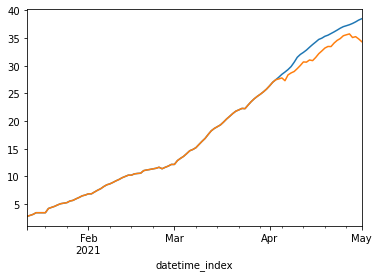

In [650]:
y.plot()
pd.concat([y_train, y_test_pred]).plot()

In [48]:
from sklearn.model_selection import train_test_split # to split data into training and testing data
from sklearn.metrics import mean_absolute_error # to evaluate model with mean absolute error

In [49]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to t

In [221]:
X_train.columns

Index(['dayofweek', 'Days_since_measurement', 'Confirmed', 'Recovered',
       'Active', 'Incident_Rate'],
      dtype='object')

In [188]:
# type(X['weekofyear'].iloc[0])

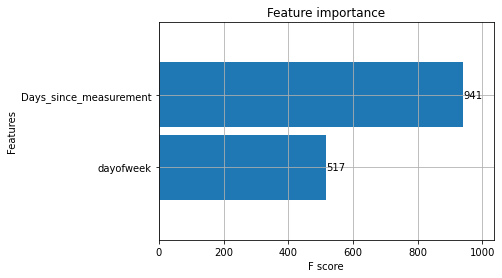

In [190]:
from xgboost import XGBRegressor
from xgboost import plot_importance, plot_tree

def get_xgb_regressor_mae(X_trn, X_tst, y_trn, y_tst):
    vax_model = XGBRegressor(random_state=1)
    vax_model.fit(X_trn, y_trn)
    y_tst_prd = vax_model.predict(X_tst)
    mae = mean_absolute_error(y_tst, y_tst_prd)
    _ = plot_importance(vax_model, height=0.9)
    return

get_xgb_regressor_mae(X_train, X_test, y_train, y_test)

In [222]:
vax_model = RandomForestRegressor(random_state=1)
vax_model.fit(X_train, y_train)
y_test_pred = vax_model.predict(X_test)
mae = mean_absolute_error(y_test, y_test_pred)
mae

<ipython-input-222-d2afc9e55bbf>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  vax_model.fit(X_train, y_train)


1303.8633333333332

In [225]:
mae/np.mean(y['Doses_admin'])*100

2.9823707210178774

In [210]:
y.copy().values.ravel()

array([  7829.,   8383.,   8928.,   8928.,   9611.,  12996.,  13236.,
        13236.,  13236.,  13236.,  18928.,  22266.,  25196.,  26423.,
        26563.,  26563.,  26563.,  29170.,  33414.,  33414.,  35976.,
        38191.,  38191.,  38191.,  40981.,  43992.,  46775.,  46775.,
        46775.,  56831.,  56831.,  60317.,  60775.,  60775.,  67600.,
        71858.,  71858.,  83554.,  92603.,  92603.,  95682.,  99099.,
        99099., 100186.])